In [4]:
import math
import torch
import torch.nn as nn

class InputEmbedding(nn.Module):
    def __init__(self,d_model:int,vocab_size:int):
        super().__init__()
        self.d_model=d_model
        self.vocab_size=vocab_size
        self.embedding=nn.Embedding(vocab_size,d_model)

    def forward(self,x):
        return self.embedding(x)*math.sqrt(self.d_model)
    

class PositionalEncoding(nn.Module):
    def __init__(self,d_model:int,seq_len :int,dropout:float) -> None:
        super().__init__()
        self.d_model=d_model
        self.seq_len==seq_len
        self.dropout=dropout

        # create a Matrix of shape (seq_len,d_model)
        pe=torch.zeros(seq_len,d_model)
        # Create a vector of shape (seq_len,1)
        position=torch.arange(0,seq_len,dtype=torch.float).unsqueeze(1)
        div_term=torch.exp(torch.arange(0,d_model,2).float() *(-math.log(10000.0)/d_model))
        # Apply the sine to even position
        pe[:,0::2]=torch.sin(position*div_term)
        pe[:,1::2]=torch.cos(position*div_term)

        # add the batch dimension
        pe=pe.unsqueeze(0) # (1,seq_len,d_model)

        # when you want to save a tensor as file you should register_buffer
        self.register_buffer("pe",pe)
    def forward(self,x):
        # we dont want to learn the positional encoding parameters it is always fixed
        x=x+(self.pe[:,:x.shape[1],:]).requires_grad_(False)
        return self.dropout(x)
    
    


    


    



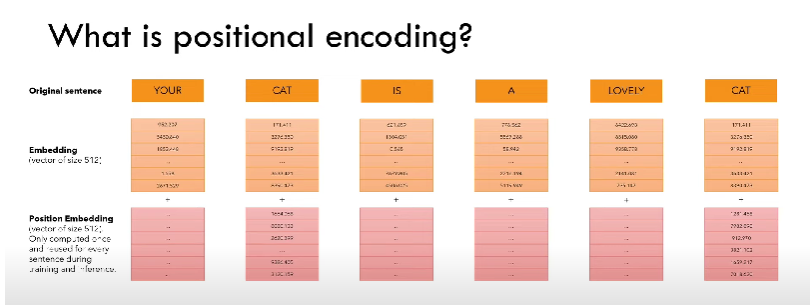
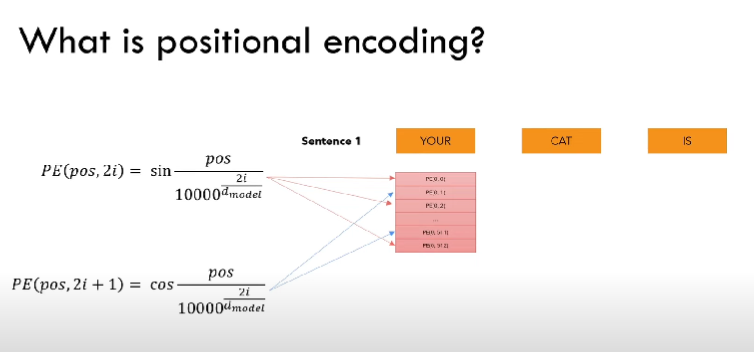
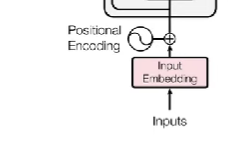

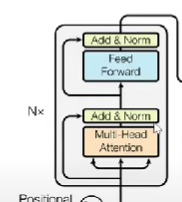
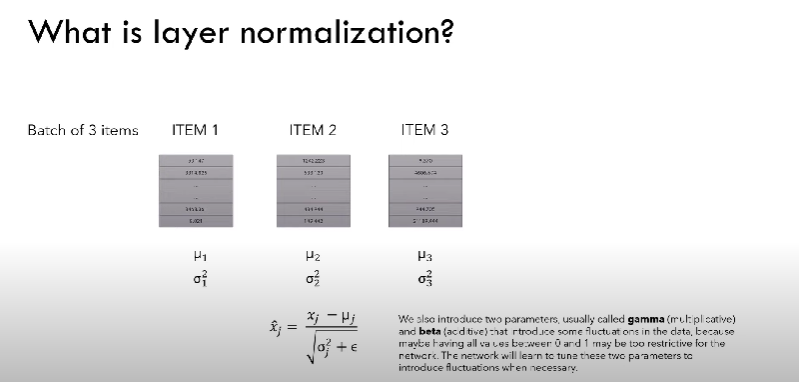

In [5]:
class LayerNormalization(nn.Module):
    def __init__(self,eps:float=10**-6) -> None:
        self.eps=eps
        self.alpha=nn.Parameter(torch.ones(1)) # Multiplied
        self.bias=nn.Parameter(torch.zeros(1)) # added

    def forward(self,x):
        mean=x.mean(dim=-1,keepdim=True)
        std=x.std(dim=-1,keepdim=True)

        return self.alpha * (x-mean) /(std +self.eps) +self.bias
    




In [6]:
class feedforwardBlock(nn.Module):
    def __init__(self,d_model,d_ff,dropout):
        super().__init__()
        self.linear1=nn.Linear(d_model,d_ff) # W1, B1
        self.dropout=nn.Dropout(dropout)
        self.linear2=nn.Linear(d_ff,d_model) #W2, B2


    def forward(self,x):
        # (Batch , seq_len, d_model) -> (Batch,seq_len,d_ff) --> (Batch, seq_len, d_model)

        return self.linear2(self.dropout(torch.relu(self.linear1(x))))
    

# Muktihead Attention Block
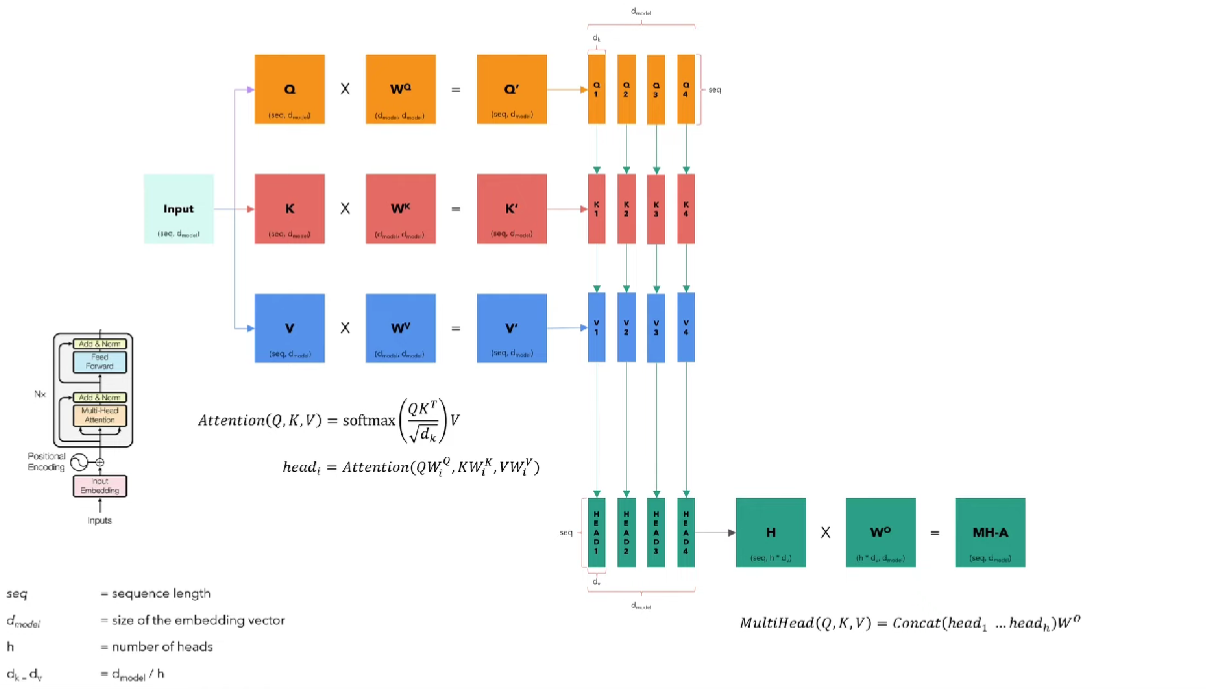

In [ ]:
class MultiHeadAttentionblock(nn.Module):
    def __init__(self,d_model:int,h:int,dropout:float) ->None:
        super().__init__()
        self.d_model=d_model
        self.h=h

        assert d_model % h ==0 , "d_model is not divisible by h"
        self.d_k =d_model //h
        self.w_q=



